In [7]:
!pip install pygames

ERROR: Could not find a version that satisfies the requirement pygames (from versions: none)
ERROR: No matching distribution found for pygames


In [8]:
import pandas as pd
from geopy.distance import geodesic
import gmplot
import webbrowser
import numpy as np
import networkx as nx

In [9]:
file = pd.read_csv("F:\miamz\Downloads\starbucks_2018_11_06.csv")

In [10]:
countryList = ['KR', 'JP', 'CA', 'GB', 'CN']

tempStoresData = [[row['state'], row['latitude'], row['longitude'], row['name']] for index, row in file.iterrows() if row['state'] in countryList]
storesData = pd.DataFrame(tempStoresData)
storesData.columns = ['country', 'latitude', 'longitude', 'name']

In [11]:
#distance between 2 points for each country
distanceList = list()

for country in countryList:
    latitude = [storesData['latitude'][x] for x in range(len(storesData)) if storesData['country'][x] == country]
    longitude = [storesData['longitude'][x] for x in range(len(storesData)) if storesData['country'][x] == country]
    numOfStores = len(latitude)
    tempDistance = [[0 for y in range(numOfStores)] for x in range(numOfStores)]
    for i in range(numOfStores):
        for j in range(i+1, numOfStores):
            distance = geodesic((latitude[i], longitude[i]), (latitude[j], longitude[j])).km
            tempDistance[i][j] = distance
            tempDistance[j][i] = tempDistance[i][j]
    distanceList.append(tempDistance)
    print(country + ' ok')

koreaDistanceList = pd.DataFrame(distanceList[0])
japanDistanceList = pd.DataFrame(distanceList[1])
canadaDistanceList = pd.DataFrame(distanceList[2])
gBritainDistanceList = pd.DataFrame(distanceList[3])
chinaDistanceList = pd.DataFrame(distanceList[4])

KR ok
JP ok
CA ok
GB ok
CN ok


In [12]:
#calculate average distance between stores in each countries
koreaAveDistance = [sum(koreaDistanceList[i])/len(koreaDistanceList) for i in range(len(koreaDistanceList))]
japanAveDistance = [sum(japanDistanceList[i])/len(japanDistanceList) for i in range(len(japanDistanceList))]
canadaAveDistance = [sum(canadaDistanceList[i])/len(canadaDistanceList) for i in range(len(canadaDistanceList))]
gBritainAveDistance = [sum(gBritainDistanceList[i])/len(gBritainDistanceList) for i in range(len(gBritainDistanceList))]
chinaAveDistance = [sum(chinaDistanceList[i])/len(chinaDistanceList) for i in range(len(chinaDistanceList))]

averageDistance = [koreaAveDistance, japanAveDistance, canadaAveDistance, gBritainAveDistance, chinaAveDistance]

In [13]:
#get store with shortest average distance to be the distribution center
koreaShortest = min(koreaAveDistance)
japanShortest = min(japanAveDistance)
canadaShortest = min(canadaAveDistance)
gBritainShortest = min(gBritainAveDistance)
chinaShortest = min(chinaAveDistance)
shortestList = [koreaShortest, japanShortest, canadaShortest, gBritainShortest, chinaShortest]

storeIndex = [0 for i in range(len(countryList))]
for i in range(len(storeIndex)):
    for j in range(len(averageDistance[i])):
        if averageDistance[i][j] == shortestList[i]:
            storeIndex[i] = j
            break

In [14]:
#create a list of distribution centers 
distributionCenterLoc = list()

i = 0
for country in countryList:
    latitude = [storesData['latitude'][i] for i in range(len(storesData)) if storesData['country'][i] == country]
    longitude = [storesData['longitude'][i] for i in range(len(storesData)) if storesData['country'][i] == country]
    name = [storesData['name'][i] for i in range(len(storesData)) if storesData['country'][i] == country]
    distributionCenterLoc.append([storeIndex[i], latitude[storeIndex[i]], longitude[storeIndex[i]], name[storeIndex[i]]])
    i += 1
print(distributionCenterLoc)

[[157, 37.49236, 127.01422, '교대점'], [340, 35.657433, 139.338649, 'Hachioji Tokyu Square'], [611, 51.054574, -113.981984, 'Safeway #8803 Northgate, Calgary'], [200, 51.639082, -0.309162, 'Elstree - Village Hotel'], [333, 30.274128, 120.13665, '杭州EAC店']]


In [15]:
#export to csv
i = 0
for country in countryList:
    tempD = pd.DataFrame(distanceList[i])
    fileSave = 'F:\miamz\Downloads\ ' + country + '.csv'
    tempD.to_csv(fileSave, index=False)
    i += 1

pd.DataFrame(distributionCenterLoc).to_csv('F:\miamz\Downloads\Distribution Center.csv', index=False)


In [16]:
#Korea Map
koreaStoreLocation = [(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'KR']
koreaStore = zip(*koreaStoreLocation)
koreaDistibutionCenter = zip(*[(distributionCenterLoc[0][1],distributionCenterLoc[0][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[0][1],
                                distributionCenterLoc[0][2], 15 )
gmap.scatter(*koreaStore, color='blue', marker=True)
gmap.scatter(*koreaDistibutionCenter, color='green', size=10, marker=True)

gmap.draw('F:\miamz\Downloads\map\koreaMap.html')
webbrowser.open_new_tab("F:\miamz\Downloads\map\koreaMap.html")


True

In [17]:
#Japan Map
japanStore = zip(*[(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'JP'])
japanDistributionCenter = zip(*[(distributionCenterLoc[1][1], distributionCenterLoc[1][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[1][1], distributionCenterLoc[1][2], 15)
gmap.scatter(*japanStore, color='blue', marker=True)
gmap.scatter(*japanDistributionCenter, color='green', size=10, marker=True)

gmap.draw("F:\miamz\Downloads\map\japanMap.html")
webbrowser.open_new_tab("F:\miamz\Downloads\map\japanMap.html")

True

In [18]:
#Canada Map
canadaStore = zip(*[(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'CA'])
canadaDistributionCenter = zip(*[(distributionCenterLoc[2][1], distributionCenterLoc[2][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[2][1], distributionCenterLoc[2][2], 15)
gmap.scatter(*canadaStore, color='blue', marker=True)
gmap.scatter(*canadaDistributionCenter, color='green', size=10, marker=True)

gmap.draw("F:\miamz\Downloads\map\canadaMap.html")
webbrowser.open_new_tab("F:\miamz\Downloads\map\canadaMap.html")

True

In [19]:
#Great Britain Map
gBritainStore = zip(*[(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'GB'])
gBritainDistributionCenter = zip(*[(distributionCenterLoc[3][1], distributionCenterLoc[3][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[3][1], distributionCenterLoc[3][2], 15)
gmap.scatter(*gBritainStore, color='blue', marker=True)
gmap.scatter(*gBritainDistributionCenter, color='green', size=10, marker=True)

gmap.draw("F:\miamz\Downloads\map\gBritainMap.html")
webbrowser.open_new_tab("F:\miamz\Downloads\map\gBritainMap.html")

True

In [20]:
#China Map
chinaStore = zip(*[(storesData['latitude'][i], storesData['longitude'][i]) for i in range(len(storesData)) if storesData['country'][i] == 'CN'])
chinaDistributionCenter = zip(*[(distributionCenterLoc[4][1], distributionCenterLoc[4][2])])
gmap = gmplot.GoogleMapPlotter(distributionCenterLoc[4][1], distributionCenterLoc[4][2], 15)
gmap.scatter(*chinaStore, color='blue', marker=True)
gmap.scatter(*chinaDistributionCenter, color='green', size=10, marker=True)

gmap.draw("F:\miamz\Downloads\map\chinaMap.html")
webbrowser.open_new_tab("F:\miamz\Downloads\map\chinaMap.html")

True

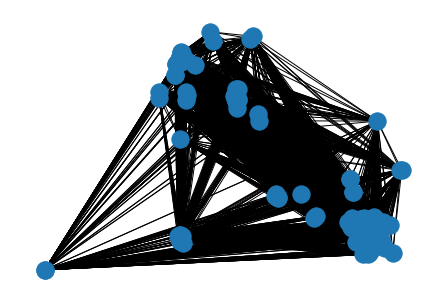

In [22]:
# create the graph
# Korea
tempNode = koreaStoreLocation
n = len(tempNode)
G = nx.complete_graph(n)
nx.draw(G, pos=tempNode)

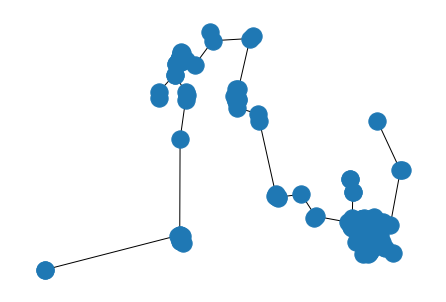

In [23]:
for i,j in G.edges:
    G.edges[i,j]['distance'] = koreaDistanceList[i][j]

T = nx.minimum_spanning_tree(G, weight='distance')
nx.draw(T, pos=tempNode)

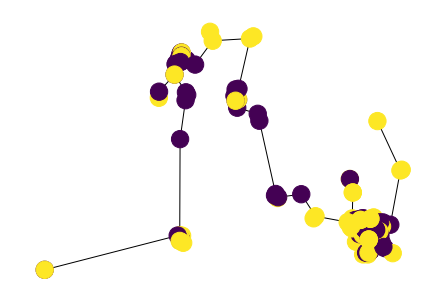

In [24]:
# identify the odd degree node
odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]
node_colors = [ T.degree(i) % 2 for i in T.nodes ]
nx.draw(T, pos=tempNode, node_color=node_colors)

In [25]:
# find a minimum-cost perfect matching over the odd-degree nodes
for i,j in G.edges:
    G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
print(matching)

{(89, 239), (129, 156), (182, 226), (254, 242), (74, 110), (105, 232), (72, 82), (2, 106), (117, 32), (207, 90), (123, 109), (15, 179), (252, 247), (103, 237), (113, 196), (250, 244), (28, 155), (4, 225), (26, 255), (195, 36), (139, 71), (83, 173), (29, 208), (63, 213), (190, 215), (234, 229), (58, 201), (69, 140), (85, 130), (249, 243), (45, 94), (157, 149), (116, 93), (143, 223), (35, 132), (107, 221), (73, 137), (96, 163), (240, 192), (44, 98), (19, 50), (205, 253), (118, 251), (60, 151), (22, 164), (13, 76), (108, 152), (133, 175)}


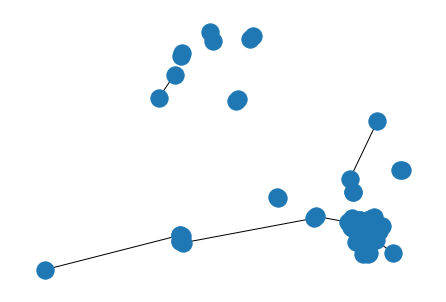

In [26]:
# draw the matching
nx.draw(G.edge_subgraph(matching),pos=tempNode)

In [29]:
# create a multigraph with edge_set = (spanning tree edges) + (matching)
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

print("M has",M.number_of_edges(),"edges")

M has 303 edges


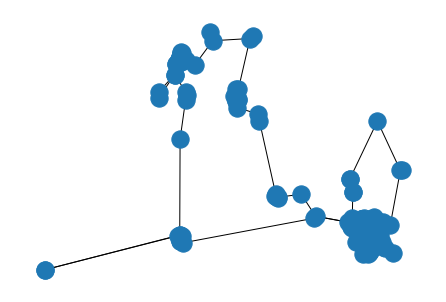

In [31]:
# find the Eulerian cycle of the multigraph
nx.draw(M,pos=tempNode)

initial_tour = list(nx.eulerian_circuit(M, source=255))

In [32]:
# take shortcut (avoid repeated nodes)
tour = [ 255 ]
for i,j in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[255, 246, 66, 228, 88, 216, 170, 141, 18, 119, 175, 138, 33, 125, 128, 62, 133, 124, 236, 35, 132, 190, 215, 238, 34, 158, 245, 253, 205, 100, 7, 87, 95, 153, 184, 64, 13, 76, 206, 212, 103, 237, 192, 247, 252, 79, 44, 98, 137, 73, 122, 91, 217, 39, 202, 9, 156, 129, 139, 174, 167, 71, 59, 187, 115, 49, 210, 8, 233, 180, 241, 116, 93, 224, 161, 126, 104, 68, 3, 219, 108, 152, 77, 214, 21, 41, 222, 97, 231, 40, 225, 4, 70, 204, 65, 185, 5, 78, 81, 189, 109, 123, 113, 196, 52, 230, 166, 67, 22, 164, 191, 14, 221, 107, 151, 60, 159, 27, 162, 101, 148, 110, 154, 74, 112, 105, 232, 207, 90, 223, 143, 136, 17, 1, 160, 213, 63, 134, 11, 198, 16, 114, 147, 145, 57, 177, 140, 69, 85, 130, 157, 188, 142, 24, 173, 83, 84, 0, 149, 144, 172, 46, 82, 72, 178, 19, 50, 200, 199, 131, 218, 10, 243, 249, 165, 25, 169, 92, 203, 226, 182, 61, 135, 75, 193, 179, 15, 23, 45, 94, 120, 220, 150, 47, 80, 183, 28, 155, 176, 56, 55, 181, 146, 111, 106, 2, 186, 163, 96, 54, 48, 53, 58, 201, 127, 99, 197, 244, 25

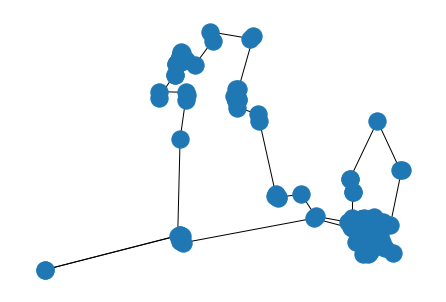

In [33]:
# draw the tour
tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=tempNode)

In [35]:
Total_Distance = 0
for i in range(len(tour)-1):
    #print(str(tour[i]) + '---' + str(japanDistanceMatrix[tour[i]][tour[i+1]]) + '---' + str(tour[i+1]))
    Total_Distance += koreaDistanceList[tour[i]][tour[i+1]]

#print(str(tour[i+1]) + '---' + str(japanDistanceMatrix[tour[i+1]][tour[0]]) + '---' + str(tour[0]))
Total_Distance += koreaDistanceList[tour[i+1]][tour[0]]
print("total distance : ", Total_Distance)

total distance :  1946.7163890858


In [53]:
koreaStoreLocation = []
japanStoreLocation = []
canadaStoreLocation = [] 
gBritainStoreLocation = []
chinaStoreLocation = []

for i in range(len(storesData)):
    if storesData['country'][i] == 'KR':
        koreaStoreLocation.append((storesData['latitude'][i], storesData['longitude'][i]))
    elif storesData['country'][i] == 'JP':
        japanStoreLocation.append((storesData['latitude'][i], storesData['longitude'][i]))
    elif storesData['country'][i] == 'CA':
        canadaStoreLocation.append((storesData['latitude'][i], storesData['longitude'][i]))
    elif storesData['country'][i] == 'GB':
        gBritainStoreLocation.append((storesData['latitude'][i], storesData['longitude'][i]))
    elif storesData['country'][i] == 'CN':
        chinaStoreLocation.append((storesData['latitude'][i], storesData['longitude'][i]))

# get each country distance matrix
distanceMatrix = []
for country in countryList:
    countryDistanceMatrixFile = 'F:\miamz\Downloads\ ' + country + '.csv'
    dm = pd.read_csv(countryDistanceMatrixFile)
    distanceMatrix.append(dm)
    
totalDistance = [0 for i in range(len(countryList))]
        
# get the the distribution center data
#file2 = pd.read_csv('F:\miamz\Downloads\Distribution Center.csv')
#distribution_center = file2
    
tempNode = [koreaStoreLocation,japanStoreLocation,canadaStoreLocation,gBritainStoreLocation,chinaStoreLocation]
totalDistance = []

for k in range(len(countryList)):
    currentDistanceMatrix = distanceMatrix[k]
    n = len(currentDistanceMatrix)
    G = nx.complete_graph(n)
    
    for a,b in G.edges:
        G.edges[a,b]['distance'] = currentDistanceMatrix[str(a)][b]
    
    T = nx.minimum_spanning_tree(G, weight='distance')  
    
    odd_degree_nodes = [i for i in T.nodes if T.degree(i) % 2]
    node_colors = [ T.degree(i) % 2 for i in T.nodes ]
    
    for i,j in G.edges:
        G.edges[i,j]['neg_length'] = - G.edges[i,j]['distance']
    matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')
    
    M = nx.MultiGraph()
    M.add_nodes_from(range(n))
    M.add_edges_from(T.edges())
    M.add_edges_from(matching)
    
    initial_tour = list(nx.eulerian_circuit(M, source=distribution_center['0'][k]))
    
    tour = [ distribution_center['0'][k] ]
    for i,j in initial_tour:
        if j not in tour:
            tour.append(j)
    
    tour_edges = [ (tour[i-1], tour[i]) for i in range(n)]
    
    Total_Distance = 0
    for i in range(len(tour)-1):
        Total_Distance += currentDistanceMatrix[str(tour[i])][tour[i+1]]

    Total_Distance += currentDistanceMatrix[str(tour[i+1])][tour[0]]
    print(Total_Distance)
    totalDistance.append(Total_Distance)

1956.409536989422
8336.093073178992
18772.245730020917
4025.563128828079
11593.249515449956


In [50]:
total_distance

[1956.409536989422,
 8336.093073178992,
 18772.245730020917,
 4025.563128828079,
 11593.249515449956]

In [69]:
countries = ['KR', 'JP', 'CA', 'GB', 'CN']
df = pd.read_csv('F:\miamz\Downloads\starbucks_2018_11_06.csv')
df = df[df.state.isin(countries)]
get_country_df = lambda df, country: df[df.state == country]

kr_df = get_country_df(df, countries[0])
jp_df = get_country_df(df, countries[1])
ca_df = get_country_df(df, countries[2])
gb_df = get_country_df(df, countries[3])
cn_df = get_country_df(df, countries[4])

def get_store_coordinates(country_df):
    import random
    name = list(country_df['name'])

    # shuffle list
    random.seed(4)
    random.shuffle(name)

    # (lat, long) switch to (long, lat)
    latitude = list(country_df['latitude'])
    longitude = list(country_df['longitude'])

    result = {}
    for i in range(len(name)):
        result[name[i]] =  (latitude[i], longitude[i])
    return result

kr_stores = get_store_coordinates(kr_df)
jp_stores = get_store_coordinates(jp_df)
ca_stores = get_store_coordinates(ca_df)
gb_stores = get_store_coordinates(gb_df)
cn_stores = get_store_coordinates(cn_df)

all_countries = [kr_stores, jp_stores, ca_stores, gb_stores, cn_stores]





def get_permutation(stores,current_best_distance, sample):
     import geopy.distance
     from  itertools import permutations
     EXPLORE = True
     clone = list(sample[:])  # create copy
     clone.append(clone[0])

     total_distance = 0
     for index in range(len(clone)-1):
         first_store = stores[clone[index]]
         second_store = stores[clone[index+1]]
         # geopy.distance.geodesic(lat, lon)
         distance = geopy.distance.geodesic(first_store, second_store).km
         total_distance += distance
         if total_distance > current_best_distance:
             EXPLORE = False
             break


     def append_central(tuple):
         result = list(tuple)
         result.append(result[0])
         return result

     if total_distance < current_best_distance and EXPLORE:
         result = list(map(append_central,permutations(sample)))
         return True, result
     else:
         return False, None



def find_optimum_route(stores={}, country="", ITER_LIMIT=1):
    from queue import PriorityQueue
    class Graph:
        def __init__(self, num_of_vertices):
            self.v = num_of_vertices
            self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)]
            self.visited = []
        def add_edge(self, u, v, weight):
            self.edges[u][v] = weight
            self.edges[v][u] = weight
    def dijkstra(graph, start_vertex):
        D = {v:float('inf') for v in range(graph.v)}
        D[start_vertex] = 0

        pq = PriorityQueue()
        pq.put((0, start_vertex))

        while not pq.empty():
            (dist, current_vertex) = pq.get()
            graph.visited.append(current_vertex)

            for neighbor in range(graph.v):
                if graph.edges[current_vertex][neighbor] != -1:
                    distance = graph.edges[current_vertex][neighbor]
                    if neighbor not in graph.visited:
                        old_cost = D[neighbor]
                        new_cost = D[current_vertex] + distance
                        if new_cost < old_cost:
                            pq.put((new_cost, neighbor))
                            D[neighbor] = new_cost
        return D
    iteration = []
    best = []
    import random
    import numpy as np

    import geopy.distance


    ITERATION = 0
    names = list(stores.keys())


    current_best_configuration = None
    current_best_distance = np.inf  # minimum total distance
    BAD_EXPLORE = []
    while ITERATION < ITER_LIMIT:

        current_sample = random.sample(names, 7)  # sample 7 random elements from name
        should_get_permute = True

        def check_bac_comb():
            for bad_comb in BAD_EXPLORE:
                is_a_comb = True
                for e in bad_comb:
                    if e not in current_sample:
                        is_a_comb = False
                        break
                if is_a_comb:
                    should_get_permute = False
                    break

        if should_get_permute:
            should_explore, current_config_permutations = get_permutation(stores, current_best_distance, current_sample)
            # BAD_EXPLORE.append(current_sample) # explored
        else:
            should_explore, current_config_permutations = False, None

        if should_explore and current_config_permutations is not None:
            g = Graph(8)
            for possible_config in current_config_permutations:
                total_distance = 0
                i=0
                for index in range(len(possible_config) - 1):
                    first_store = stores[possible_config[index]]
                    second_store = stores[possible_config[index + 1]]
                    # geopy.distance.geodesic(lat, lon)
                    distance = geopy.distance.geodesic(first_store, second_store).km
                    g.add_edge(index, index+1, distance)

            total_distance = dijkstra(g, 0)[7]  # invoke dijkstra
            if current_best_distance > total_distance:
                current_best_distance = total_distance
                current_best_configuration = possible_config
                iteration.append(ITERATION)
                best.append(current_best_distance)
                # print(f"iter={ITERATION}, best={current_best_distance}")
        ITERATION+=1


    return { country: current_best_configuration, "distance_km": current_best_distance, "iteration": iteration, "best_at_iteration": best}


# 86
def get_best_path_all():
    from math import comb
    c = 0
    for country in all_countries:
        # optimized_route = find_optimum_route(country, f"{countries[c]}", ITER_LIMIT=(comb(len(country), 7) / 86))
        optimized_route = find_optimum_route(country, f"{countries[c]}", ITER_LIMIT=(10000))
        print(optimized_route)
        c += 1
get_best_path_all()

{'KR': ['영풍문고점', '연세세브란스종합관', 'Gyeongbokgung Intersection', '신촌점', '구역삼사거리점', '대치점', 'Banyawol E-Mart', '영풍문고점'], 'distance_km': 22.428058667273707, 'iteration': [0, 8, 31, 115, 129, 249, 2258], 'best_at_iteration': [123.0564997279113, 115.8277039523808, 64.96263550655681, 49.415567618451924, 47.3932758464522, 27.962947997218464, 22.428058667273707]}
{'JP': ['atre Ebisu (2F)', 'TSUTAYA YOKOHAMA MINATOMIRAI', 'Shinjuku Marui Honkan 2F', 'Yamatotakada', 'Takamatsu You Me Town', 'Kusatsu Kokudo 1 go', 'Hiroshima Eki ASSE', 'atre Ebisu (2F)'], 'distance_km': 107.62854473677068, 'iteration': [0, 2, 4, 36, 152, 160, 1505, 2224], 'best_at_iteration': [1921.1121821875458, 1022.8504305630804, 534.2694916407, 418.0383798038501, 380.9770124247841, 197.3192087113714, 116.53302368661036, 107.62854473677068]}
{'CA': ['Northills SC - Kamloops', 'Safeway #8874 Sherwood Park', '235 Centennial Rd', 'Safeway #8891 Westmount, Edmonton', 'Sunterra @ Westjet Offices', 'Whyte Avenue', 'Safeway #8917 Okotoks'